# <center> TP 3 : Apprentissage d'un mélange - Algorithme EM

## Chargement des données MNIST

In [1]:
%pylab
%matplotlib inline 

from mnist import load_mnist
import numpy as np
import visualize as vz

train_data, train_labels = load_mnist(dataset='training', path='./')
test_data, test_labels = load_mnist(dataset='testing', path='./')

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


Transformation de `train_data` et `test_data` en vecteur colonne pour chaque exemple.

In [2]:
train_data = np.reshape(train_data, (60000, 28 * 28)).T
test_data  = np.reshape(test_data,  (10000, 28 * 28)).T

Binarisation des données :

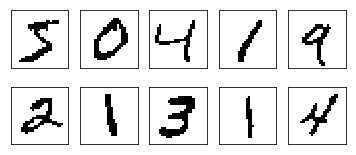

In [3]:
binarize = lambda x : x < 128 / 255
vfunc = np.vectorize(binarize)
train_data = vfunc(train_data)
test_data = vfunc(test_data)

vz.plotGroupImages(train_data[:, :10])

## Partie 1 : Théorie

A partir de ce qui a été vu en cours, déduire les étapes de l'algorithme EM pour l'apprentissage des paramètres d'un mélange de loi de Bernoulli. Donner les formules de mise à jour des différents paramètres du modèle.

L'algorithme EM fonctionne suivant deux étapes :
* L'étape appelée "expectation", qui consiste à calculer tous les poids de tous les points pour toutes les composantes.
* L'étape appelée "maximization", qui vise à recalculer les moyennes pour chaque composante, en modifiant les poids de chaque composante.

On pose N correspondant aux nombres d'éléments dans le dataset {$X_1, \ldots, X_n$}, K correspondant aux nombres de composantes souhaitées,
$w_i$ le poid associé à la i-ème composante.

**Etape 1 : Initialisation des paramètres**

* Initialisation des moyennes de chaque composante.
* Initialisation des poids, tels que $\sum_{i=1}^{K}{w_i} = \sum_{i=1}^K{P(i)} = 1$.

**Etape 2 : Expectation**

* Nous savons que la vraisemblance $P(X_i | \mu_k) = \mu_k^{X_i} (1 − \mu_k)^{N − X_i}$ en utilisant une distribution de Bernoulli.
* On calcule l'a posteriori : $P(k|X_i) = \frac{w_k P(X_i|\mu_k)}{\sum_{j=1}^{K}{w_j P(X_j|\mu_k)}} = \frac{w_k (\mu_k^{X_i} (1 − \mu_k)^{N − X_i})}{\sum_{j=1}^{K}{w_j (\mu_k^{X_j}(1 − \mu_k)^{N − X_j})}}$

**Etape 3 : Maximization**

* On calcule de nouveaux poids : $P(k) = w_k = \frac{\sum_{i=1}^{N}{P(k|X_i)}}{N}$
* On calcule les nouvelles moyennes : $\mu_k = \frac{\sum_{i=1}^{N}{P(k|X_i)X_i}}{\sum_{i=1}^{N}{P(k|X_i)}}$

## Partie 2 : Implémentation

On vous demandera de tester différentes valeurs pour le nombre de composantes du mélange ainsi que différentes initialisations du modèle.

**1.** Implémenter cet algorithme et faire l'apprentissage sur les données binaires TRAINB obtenues précedemment. Attention à la manipulation des valeurs de probabilités (entre 0 et 1) qui deviennent rapidement nulles à cause de la précision des chiffres flottants.

In [4]:
from EmBernoulli import *

emb = EmBernoulli()
#W, center = emb.computeEM(test_data, 10)

**2.** Afficher les moyennes des différentes distributions de Bernoulli ?

In [5]:
#vz.plotGroupImages(center)

**3.** En utilisant uniquement 10 composantes, est-il possible d'avoir un centre par classe ? Justifier.

In [6]:
#TODO

**4.** Tester un classifieur bayésien en utilisant un mélange pour chaque classe ? Quel est le taux de reconnaissance obtenu (tester 1, 2, 4, et 8 composantes par classe) ?

In [ ]:
# TODO

## Partie 3 : Comparaison avec un GMM

Comparer les résultats obtenus avec le cas d'un mélange de gaussiennes sur les données brutes TRAIN et TEST.

* On a $N(X; \mu, \Theta) = \frac{1}{\sqrt{(2\pi)^D|\Theta|}} exp(-0.5(X - \mu)^T\Theta^{-1}(X - \mu))$
* La vraisemblance : $P(k|X) = \frac{w_k N(X;\mu_k,\Theta_k)}{\sum_{j=1}^{N}{w_j N(X,\mu_j,\Theta_j)}}$
* $P(k) = \frac{\sum_{i=1}^{N}{P(k|X_i)}}{N}$
* $\mu_k = \frac{\sum_{i=1}^{N}{P(k|X_i)X_i}}{\sum_{i=1}^{N}{P(k|X_i)}}$
* $\Theta_k = \frac{\sum_{i=1}^{N}{P(k|X_i)(X_i - \mu_k)^2}}{\sum_{i=1}^{N}{P(k|X_i)}}$

**1.** Envisager le cas de gaussienne avec des matrices de covariance diagonale, ensuite tester la version avec matrices de covariance complètes.

In [ ]:
from EmGaussian import *

emg = EmGaussian(test_data, 10)
W, center, cov = emg.computeEM()
vz.plotGroupImages(center)

**2.** Attention à la dégénérescence de l'algorithme EM (matrice de covariance non inversible). Il faut voir comment gérer ce problème ainsi que l'initialisation.

In [ ]:
# TODO

**3.** Proposer la meilleure solution pour avoir le plus haut taux de reconnaissance.

In [ ]:
# TODO